# SFMA and Stoned comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sfma import Data, SFMAModel, Variable, SplineVariable, SplineGetter, SplinePriorGetter, UniformPrior
from pystoned import CNLS,StoNED
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_MOM,RED_QLE,RED_KDE
from pystoned import CNLS, StoNED
from scipy import optimize
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from sklearn.pipeline import Pipeline
from func_benchmark import *
import warnings
warnings.filterwarnings('ignore')

In [22]:
data_ = comp_sfa()

In [23]:
df = data_.generate_(type = "homosk",u_scale=1, e_scale = 0.2, n_sample = 200)

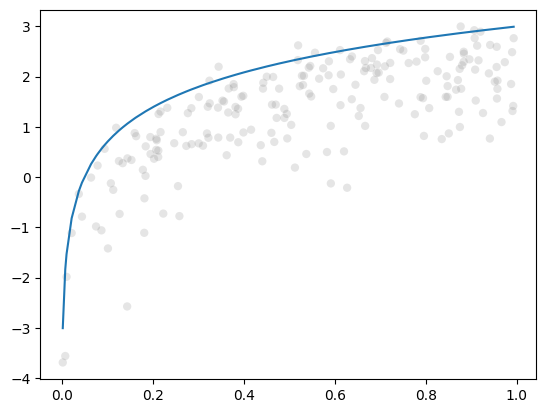

In [24]:
plt.scatter(df['x'], df['y'], color="gray", edgecolor="none", alpha=0.2)
plt.plot(df['x'], df['y_true'])

In [25]:
df.head()

,x,y,se,y_true
0,0.002466,-3.688094,0.2,-3.005182
1,0.007957,-3.559379,0.2,-1.833666
2,0.010766,-1.983780,0.2,-1.531387
3,0.021971,-1.112806,0.2,-0.818023
4,0.037710,-0.334471,0.2,-0.277820


## Data generation

## Homoskedastic variance

## 200 X 1

In [26]:
df = data_.generate_(type = "homosk",e_scale=0.2,u_scale = 1, n_sample = 200)

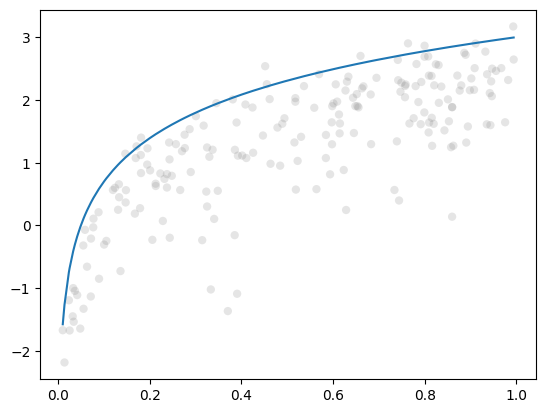

In [27]:
plt.scatter(df['x'], df['y'], color="gray", edgecolor="none", alpha=0.2)
plt.plot(df['x'], df['y_true'])

## Result for Stoned 

In [28]:
df_st = data_.stoned_(df = df)

Estimating the additive model remotely with mosek solver.


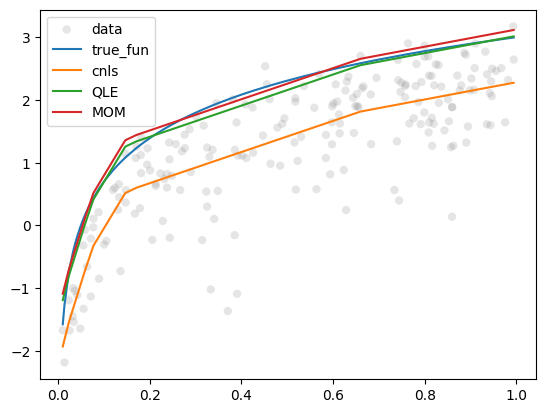

In [29]:
def plot_stoned():
    plt.scatter(df['x'], df['y'], color= "gray", edgecolor="none", alpha=0.2) 
    plt.plot(df['x'], df['y_true'])
    plt.plot(df_st['x'], df_st['y_cnls'])
    plt.plot(df_st['x'], df_st['y_qle'])
    plt.plot(df_st['x'], df_st['y_mom'])
    plt.legend(['data','true_fun','cnls','QLE','MOM'])
plot_stoned()


## Result for SFMA

In [30]:
df_sfa = data_.sfma_(df)


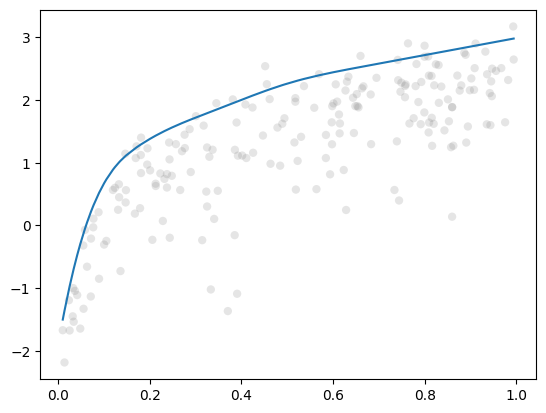

In [31]:
plt.scatter(df['x'], df['y'], color="gray", edgecolor="none", alpha=0.2) 
plt.plot(df_sfa['x'], df_sfa['pred'])


## Comparing results (SFMA vs StoNED)

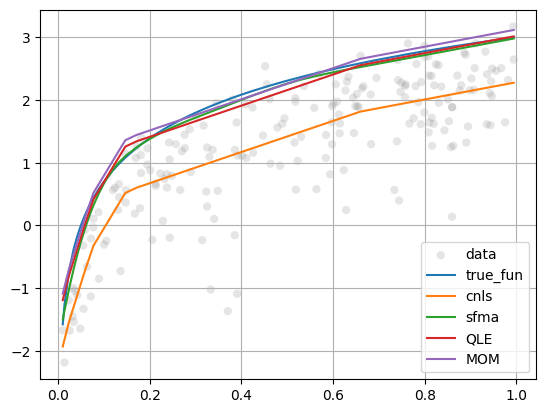

In [34]:
plt.scatter(df['x'], df['y'], color= "gray", edgecolor="none", alpha=0.2) 
plt.plot(df['x'], df['y_true'])
plt.plot(df_st['x'], df_st['y_cnls'])
plt.plot(df_sfa['x'], df_sfa['pred'])
plt.plot(df_st['x'], df_st['y_qle'])
plt.plot(df_st['x'], df_st['y_mom'])
plt.legend(['data','true_fun','cnls','sfma','QLE','MOM'])
plt.grid()

In [35]:
def mse_all():
    mse_QLE = mean_squared_error(df_st['y_qle'], df['y_true'])
    mse_MOM = mean_squared_error(df_st['y_mom'], df['y_true'])
    mse_cnls = mean_squared_error(df_st['y_cnls'], df['y_true'])
    mse_sfma = mean_squared_error(df_sfa['pred'], df['y_true'])
    print('mse_QLE:',mse_QLE)
    print('mse_MOM:',mse_MOM)
    print('mse_cnls:',mse_cnls)
    print('mse_sfma:',mse_sfma)
mse_all()

mse_QLE: 0.010162341399552823
mse_MOM: 0.00963000852012173
mse_cnls: 0.6350252118144789
mse_sfma: 0.00784313683256583


In [15]:
df['data_id'] = df.index
df['data_type'] = 'homosk'

In [17]:
df.to_csv('df_origin.csv',index=True)

In [16]:
df_results = df_st

In [17]:
df_results['data_id'] = df['data_id'] 
df_sfa['data_id'] = df['data_id'] 
df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id']
df_results.head()

,x,y,model_cnls,model_qle,model_mom,data_id
0,0.003183,-3.458606,-3.619470,-2.877203,-2.941145,0
1,0.006990,-3.117342,-2.728484,-1.986217,-2.050158,1
2,0.009748,-1.468090,-2.083076,-1.340809,-1.404751,2
3,0.011872,-1.842942,-1.951748,-1.209481,-1.273422,3
4,0.016464,-1.281821,-1.667824,-0.925557,-0.989498,4


In [23]:
df_results = df_results.merge(df_sfa, on=['data_id']) 

In [25]:
df_results = df_results.drop(columns =['x_y'])

In [26]:
df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id','model_sfma']

In [27]:
df_results.head()

,x,y,model_cnls,model_qle,model_mom,data_id,model_sfma
0,0.008739,-2.301667,-2.478633,-1.816323,-1.823114,0,-1.358114
1,0.013041,-2.754557,-2.278604,-1.616294,-1.623085,1,-1.214702
2,0.015607,-1.723398,-2.159312,-1.497002,-1.503793,2,-1.077080
3,0.016880,-1.313919,-2.109229,-1.446919,-1.453710,3,-0.945098
4,0.023941,-3.205430,-1.831597,-1.169287,-1.176078,4,-0.818605


In [28]:
df_melted = pd.melt(df_results, id_vars=["data_id","x",'y'], value_vars=['model_cnls','model_qle','model_mom','model_sfma'])

In [29]:
df_melted.head()

,data_id,x,y,variable,value
0,0,0.008739,-2.301667,model_cnls,-2.478633
1,1,0.013041,-2.754557,model_cnls,-2.278604
2,2,0.015607,-1.723398,model_cnls,-2.159312
3,3,0.016880,-1.313919,model_cnls,-2.109229
4,4,0.023941,-3.205430,model_cnls,-1.831597


In [31]:
df.to_csv('df_origin_homosk.csv',index=False)

In [33]:
df_melted['data_type'] = 'homosk'

In [34]:
df_melted.columns = ['data_id','x','y','model','value','data_type']

In [35]:
df_melted.head()

,data_id,x,y,model,value,data_type
0,0,0.008739,-2.301667,model_cnls,-2.478633,homosk
1,1,0.013041,-2.754557,model_cnls,-2.278604,homosk
2,2,0.015607,-1.723398,model_cnls,-2.159312,homosk
3,3,0.016880,-1.313919,model_cnls,-2.109229,homosk
4,4,0.023941,-3.205430,model_cnls,-1.831597,homosk


In [36]:
df_melted.to_csv('df_model_homosk.csv',index=False)

## Modular Code

In [2]:
data_ = comp_sfa() 
df = data_.generate_(type = "homosk",u_scale=1, e_scale = 0.2, n_sample = 200)
df['data_id'] = df.index
df['data_type'] = 'homosk'
def model_tab_gen(df):
    df_st = data_.stoned_(df = df)
    df_sfa = data_.sfma_(df)
    df_results = df_st
    df_results['data_id'] = df['data_id'] 
    df_sfa['data_id'] = df['data_id'] 
    df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id']
    df_results = df_results.merge(df_sfa, on=['data_id','x'])
    df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id','model_sfma']
    df_melted = pd.melt(df_results, id_vars=["data_id","x",'y'], value_vars=['model_cnls','model_qle','model_mom','model_sfma'])
    df_melted['data_type'] = 'homosk'
    df_melted.columns = ['data_id','x','y','model','value','data_type']
    df_melted.head()
    return df_melted


In [3]:
model_tab_gen(df)

Estimating the additive model remotely with mosek solver.


,data_id,x,y,model,value,data_type
0,0,0.002544,-4.943189,model_cnls,-4.940484,homosk
1,1,0.006910,-2.344131,model_cnls,-2.500914,homosk
2,2,0.007896,-1.958658,model_cnls,-2.451857,homosk
3,3,0.008850,-1.567263,model_cnls,-2.404389,homosk
4,4,0.013311,-4.074562,model_cnls,-2.182557,homosk
...,...,...,...,...,...,...
795,195,0.993975,3.131792,model_sfma,3.107691,homosk
796,196,0.998072,2.702138,model_sfma,3.115146,homosk
797,197,0.998524,2.731074,model_sfma,3.115968,homosk
798,198,0.998720,2.579681,model_sfma,3.116324,homosk


In [39]:
df_results = df_st
df_results['data_id'] = df['data_id'] 
df_sfa['data_id'] = df['data_id'] 
df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id']
df_results.head()

,x,y,model_cnls,model_qle,model_mom,data_id
0,0.001544,-4.205531,-4.189377,-3.474675,-3.502593,0
1,0.002304,-3.104589,-3.378368,-2.663666,-2.691584,1
2,0.003984,-3.435356,-3.042531,-2.327829,-2.355747,2
3,0.007381,-1.959722,-2.363376,-1.648674,-1.676593,3
4,0.008957,-2.534295,-2.198835,-1.484133,-1.512052,4


In [45]:
df_results = df_results.merge(df_sfa, on=['data_id','x'])

In [43]:
df_results.columns = ['x','y','model_cnls','model_qle','model_mom','data_id','model_sfma']
df_results.head()

,x,y,model_cnls,model_qle,model_mom,data_id,model_sfma
0,0.001544,-4.205531,-4.189377,-3.474675,-3.502593,0,-1.708062
1,0.002304,-3.104589,-3.378368,-2.663666,-2.691584,1,-1.676729
2,0.003984,-3.435356,-3.042531,-2.327829,-2.355747,2,-1.608327
3,0.007381,-1.959722,-2.363376,-1.648674,-1.676593,3,-1.473775
4,0.008957,-2.534295,-2.198835,-1.484133,-1.512052,4,-1.413051


In [44]:
df_melted = pd.melt(df_results, id_vars=["data_id","x",'y'], value_vars=['model_cnls','model_qle','model_mom','model_sfma'])
df_melted['data_type'] = 'homosk'
df_melted.columns = ['data_id','x','y','model','value','data_type']
df_melted.head()

,data_id,x,y,model,value,data_type
0,0,0.001544,-4.205531,model_cnls,-4.189377,homosk
1,1,0.002304,-3.104589,model_cnls,-3.378368,homosk
2,2,0.003984,-3.435356,model_cnls,-3.042531,homosk
3,3,0.007381,-1.959722,model_cnls,-2.363376,homosk
4,4,0.008957,-2.534295,model_cnls,-2.198835,homosk


In [ ]:
def plot_stoned():
    plt.scatter(df['x'], df['y'], color= "gray", edgecolor="none", alpha=0.2) 
    plt.plot(df['x'], df['y_true'])
    plt.plot(df_st['x'], df_st['y_cnls'])
    plt.plot(df_st['x'], df_st['y_qle'])
    plt.plot(df_st['x'], df_st['y_mom'])
    plt.legend(['data','true_fun','cnls','QLE','MOM'])
plot_stoned()